<a href="https://colab.research.google.com/github/ahmad777-Ai/Advanced-AI/blob/main/AI_LAB4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error , mean_absolute_error



Step 1: load the data

In [5]:
df = pd.read_csv('Boston.csv')
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
df= df.rename(columns={'medv':'TARGET' , 'rm':'RM' , 'lstat':'LSTAT'})
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,RM,age,dis,rad,tax,ptratio,black,LSTAT,TARGET
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
df[["LSTAT" , "RM" , "TARGET"]]

,LSTAT,RM,TARGET
0,4.98,6.575,24.0
1,9.14,6.421,21.6
2,4.03,7.185,34.7
3,2.94,6.998,33.4
4,5.33,7.147,36.2
...,...,...,...
501,9.67,6.593,22.4
502,9.08,6.120,20.6
503,5.64,6.976,23.9
504,6.48,6.794,22.0


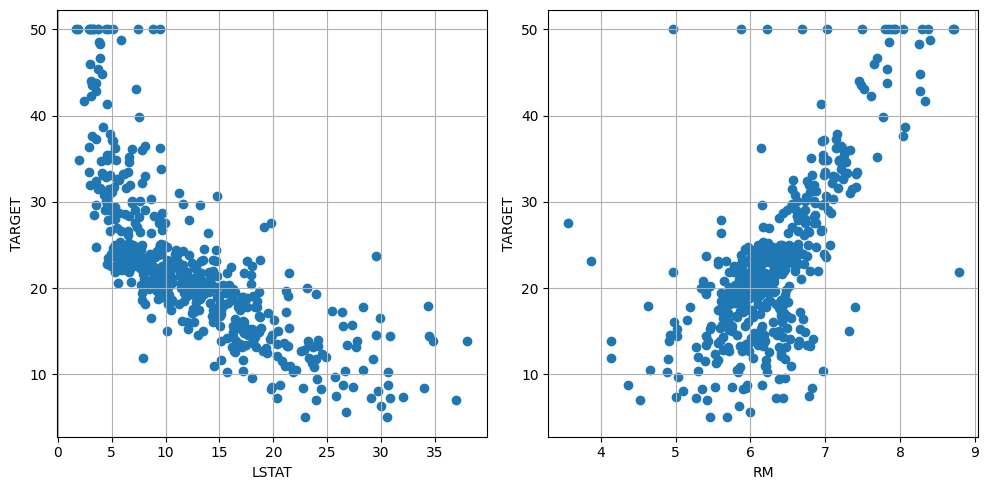

In [15]:
# plt.figure(figsize=(10,5))

features = df[["LSTAT" , "RM"]]
target =df['TARGET']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(df['LSTAT'], df['TARGET'])
plt.xlabel('LSTAT')
plt.ylabel('TARGET')
plt.grid(True)


plt.subplot(1, 2, 2)
plt.scatter(df['RM'], df['TARGET'])
plt.xlabel('RM')
plt.ylabel('TARGET')

plt.tight_layout()
plt.grid(True)
plt.show()


In [16]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=23)

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [22]:
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

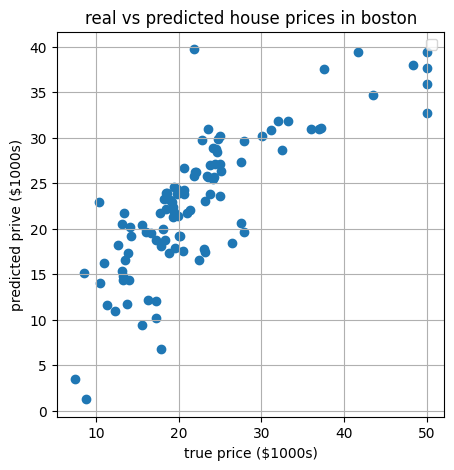

In [25]:
plt.figure(figsize=(5,5))
plt.scatter(y_test , y_pred)
plt.axis('tight')
plt.xlabel('true price ($1000s)')
plt.ylabel('predicted prive ($1000s)')
plt.title("real vs predicted house prices in boston")
plt.legend()
plt.grid(True)
plt.show()

In [29]:
intercept = model.intercept_
coefficients = model.coef_

feature_name = X_train.columns

model_Equation = "y = {:.2f}".format(intercept)

for i , coef in enumerate(coefficients):
    model_Equation+= " + {:.2f} * {}".format(coef , feature_name[i])

print("model Equation" ,model_Equation)

model Equation y = 0.37 + -0.67 * LSTAT + 4.88 * RM


In [39]:
mse = mean_squared_error(y_test , y_pred)
print('Mean Square Error {:.3f}'.format(mse))

mae = mean_absolute_error(y_test , y_pred)
print('Mean Absolute Error {:.2f}'.format(mae))


r2 = r2_score(y_test , y_pred)
print('r2 score {:.4f}'.format(r2))

Mean Square Error 30.726
Mean Absolute Error 4.30
r2 score 0.6433


In [48]:
import numpy as np

length_of_y_train = len(y_train)
length_of_y_test = len(y_test)
print(length_of_y_train)
print(length_of_y_test)


404
102


In [54]:
no_train = np.arange(1, length_of_y_train + 1)
no_test = np.arange(1,length_of_y_test + 1)

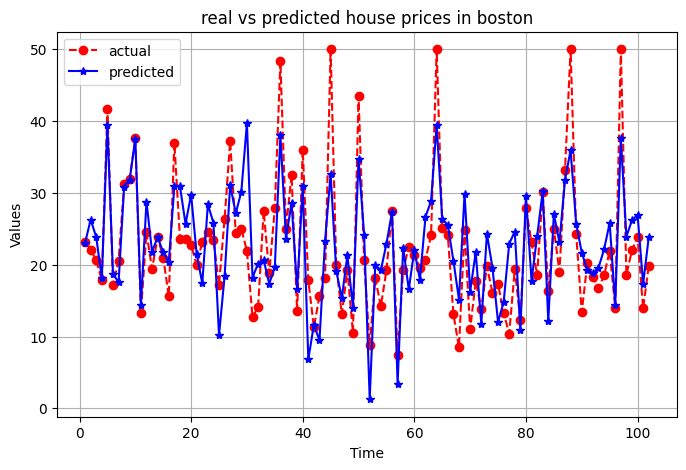

In [60]:
plt.figure(figsize=(8,5))
plt.plot(no_test, y_test, linestyle='--', color='red', marker='o', label ='actual')
plt.plot(no_test, y_pred, linestyle='-', color='blue', marker='*', label ='predicted')
plt.legend()
plt.axis('tight')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title("real vs predicted house prices in boston")
plt.grid(True)
plt.show()